# **Histogram of Oriented Gradient (HOG)**

Load the image '23080' from the Berkeley Segmentation Dataset (just Google “Berkeley Segmentation Dataset 23080"). Implement the Histogram of Oriented Gradient of the above mentioned image.

In [ ]:
%matplotlib inline

import cv2
import math
import numpy as np
import pandas as pd
from sys import argv
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from google.colab.patches import cv2_imshow

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

### **Load Image**

In [ ]:
!curl -o image.png https://i.ibb.co/31dYGmc/IMG-0804.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18067  100 18067    0     0   271k      0 --:--:-- --:--:-- --:--:--  271k


### **Show Image**

In [ ]:
def show_image(img, name= "Image"):
  print(name)
  # cv2.imwrite(name+ ".png", img)
  # cv2_imshow(img)
  plt.imshow(img, cmap= "gray")
  plt.show()

Image


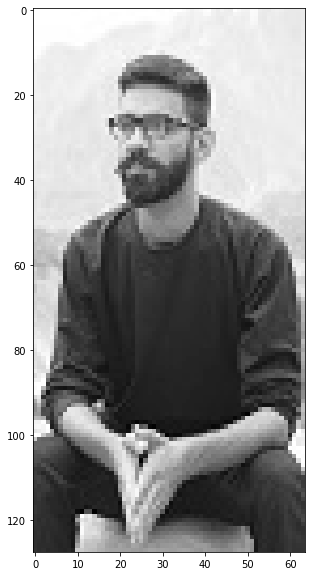

In [ ]:
IMAGE = np.array(cv2.imread('/content/image.png',0))
show_image(IMAGE)

# **HoG**


## **Gradient of image by centered filter**

In [ ]:
def centered_filter(tempImage, tempfilter):
  
  H, W = tempImage.shape
  M, N = tempfilter.shape

  newImage = np.full((H-(M-1), W-(N-1)), 100)
  
  for i in range(0, H-M+1):
    for j in range(0, W-N+1):

      tempPart = tempImage[i:i+M, j:j+N]
      tempResult = tempPart * tempfilter

      newImage[i, j] = np.sum(tempResult)

  return newImage

## **Gradient Magnitude**

In [ ]:
def get_magnitudet(X, Y):
  MG = np.sqrt(X**2 + Y**2)
  return np.array(np.around(MG,0), dtype= np.int16)

## **Gradient Direction**

In [ ]:
def get_direction(X, Y):  
  DG  = Y / X
  DG[np.isnan(DG)] = np.inf
  
  for i, rowDG in enumerate(DG):
    for j, val in enumerate(rowDG):
      DG[i, j] = math.degrees(math.atan(val))

  return np.array(np.around(DG,2), dtype= np.int16)

## **Histogram of Gradient**

In [ ]:
def plot_bin(binVal):
  index = np.array(np.arange(len(binVal))*20, dtype= np.str)
  plt.bar(index, binVal)
  plt.xlabel('Bins')
  plt.ylabel('Gradient Magnitude')
  plt.title('Histogram of Gradient')
  plt.show()

# **HoG 9 Bins**

In [ ]:
def HoG_bins(Mag, Dir):

  newBins = np.full((18), 0.0)
  
  Mag = Mag.flatten()
  Dir = Dir.flatten()

  temp = np.where(Dir < 0)

  Dir[temp] = (360 + Dir[temp]) % 360

  for (gD, gM) in zip(Dir, Mag):
    
    index  = math.floor((gD/360)*18)
    
    floorLimt = index * 20
    upperLimt = (floorLimt + 20)

    fLA = ((upperLimt - gD) / 20) * gM
    uLA = gM - fLA

    newBins[int(floorLimt/20)] =  newBins[int(floorLimt/20)] + fLA
    newBins[int((upperLimt % 360)/20)] = newBins[int((upperLimt % 360)/20)] + uLA
    
  newBins = newBins[:9] + newBins[9:]
  print(newBins)
  plot_bin(newBins)
  Concatenate_histograms.append(newBins)
  return newBins


## **HoG Cells**

In [ ]:
def HoG_cells(tempBlock):
  
  for i in range(0, 2):
    for j in range(0, 2):
      tempCell = tempImage[(i*8):((i*8)+8), (j*8):((j*8)+8)]
      
      #Centered Filter masks in x and y direction
      cF = np.array([[-1, 0, 1]])
      cF_X = centered_filter(tempCell, cF)
      cF_Y = centered_filter(tempCell, cF.T)

      #Zero padding (8,6)
      padding = np.full((8), 0)

      cF_X = np.insert(cF_X,0 , padding, axis=1)
      cF_X = np.insert(cF_X,7 , padding, axis=1)
      cF_Y = np.insert(cF_Y,0 , padding, axis=0)
      cF_Y = np.insert(cF_Y,7 , padding, axis=0)

      # Magnitude
      cF_Mag = get_magnitudet(cF_X, cF_Y)

      # Direction
      cF_Dir = get_direction(cF_X, cF_Y)
      show_image(cF_Mag)
      HoG_bins(cF_Mag, cF_Dir)


## **HoG Blocks**

In [ ]:
def HoG_blocks(tempImage):
  for i in range(0, 15):
    for j in range(0, 7):
      tempBlock = tempImage[(i*8):((i*8)+16), (j*8):((j*8)+16)]
      # show_image(tempBlock, "BLOCK 16*16")
      HoG_cells(tempBlock)
    #   break
    break

## **HoG**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


Image


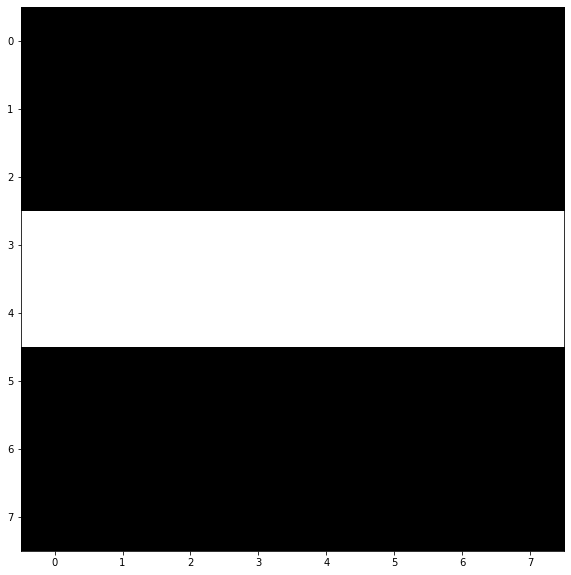

[0. 0. 0. 0. 8. 8. 0. 0. 0.]


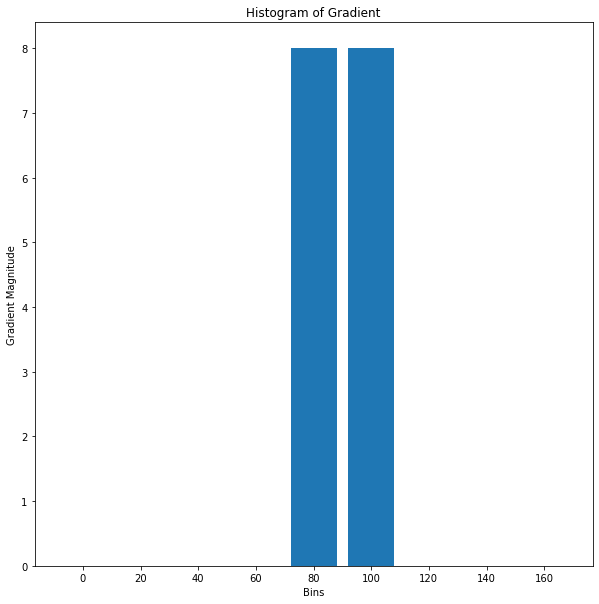

Image


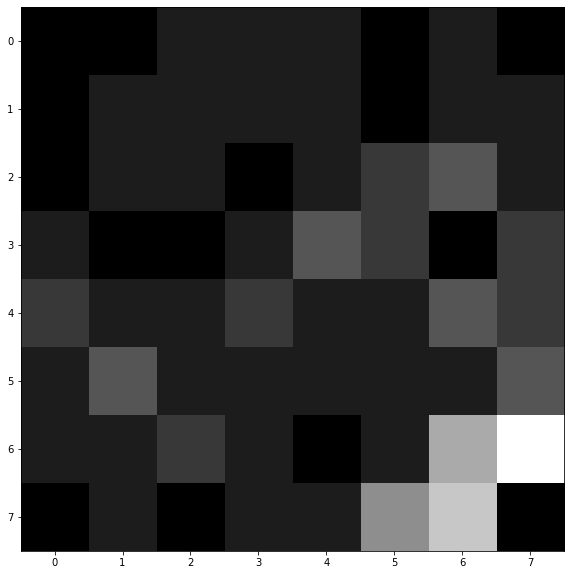

[28.    0.   10.5   9.6  17.9  14.3   3.45  5.25  0.  ]


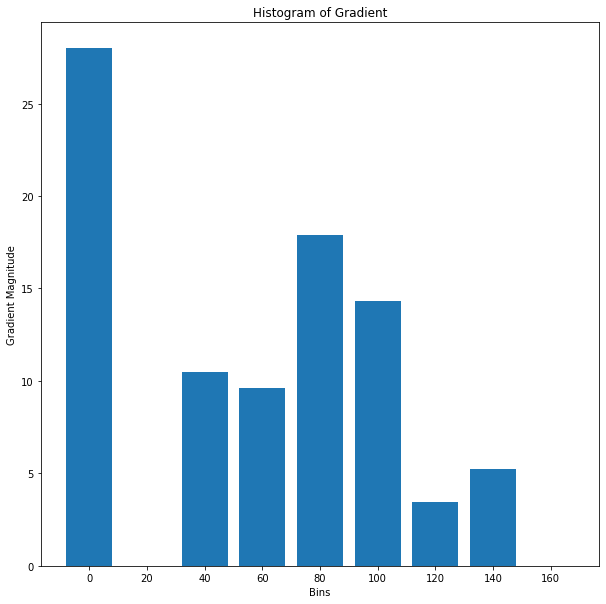

Image


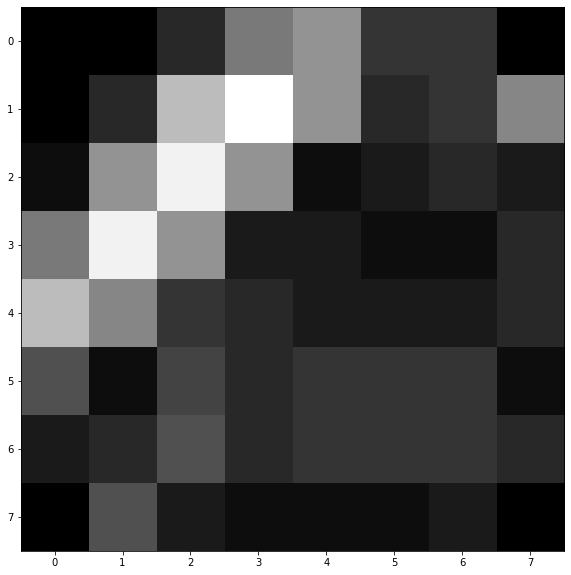

[62.2  28.3  95.   23.05 39.65 35.3   2.7   4.45 10.35]


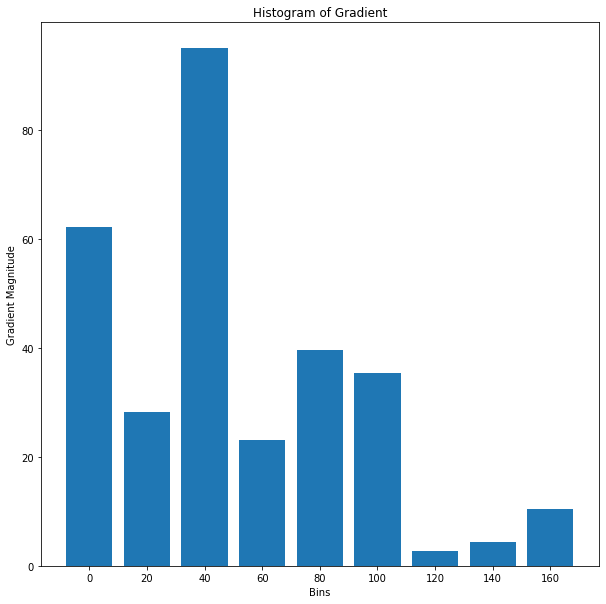

Image


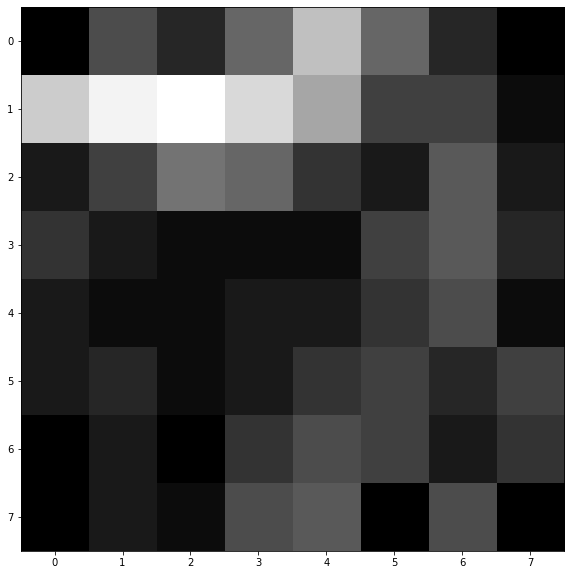

[82.8  24.3  31.05 17.4  42.55 59.   25.7   5.5   2.7 ]


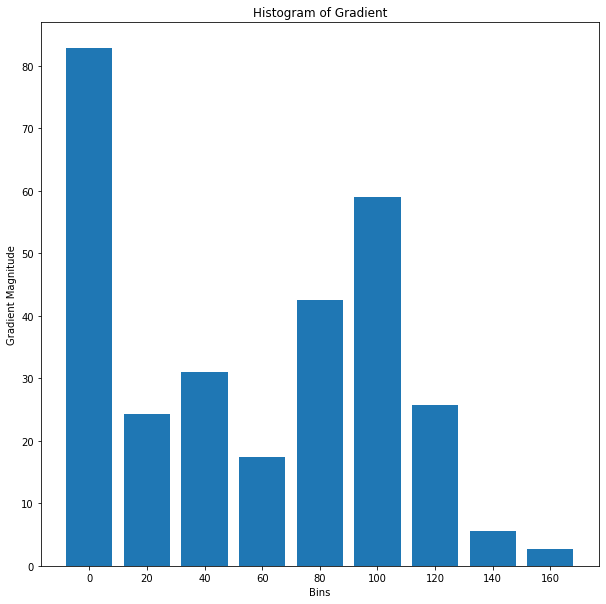

Image


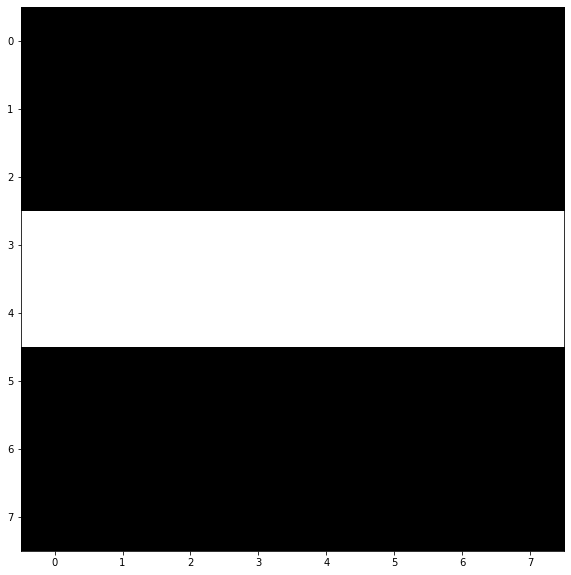

[0. 0. 0. 0. 8. 8. 0. 0. 0.]


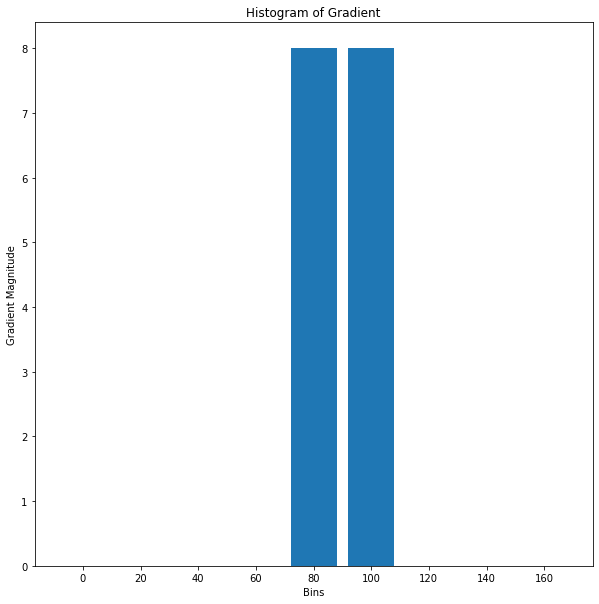

Image


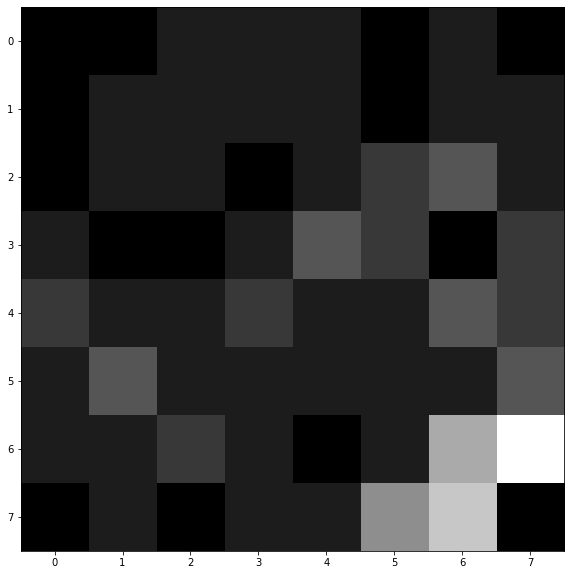

[28.    0.   10.5   9.6  17.9  14.3   3.45  5.25  0.  ]


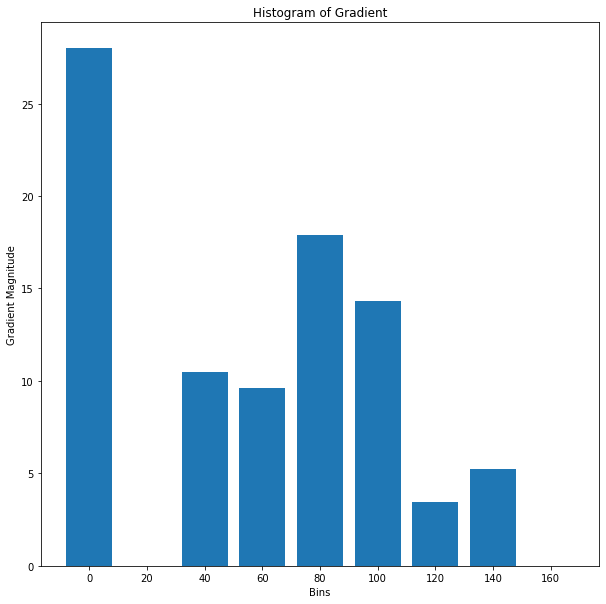

Image


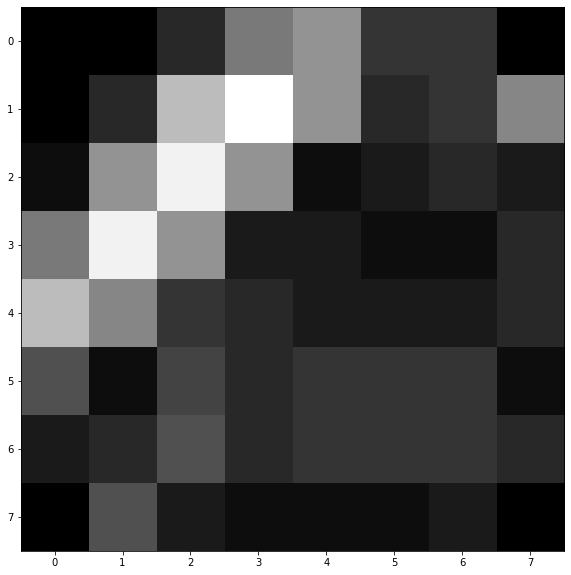

[62.2  28.3  95.   23.05 39.65 35.3   2.7   4.45 10.35]


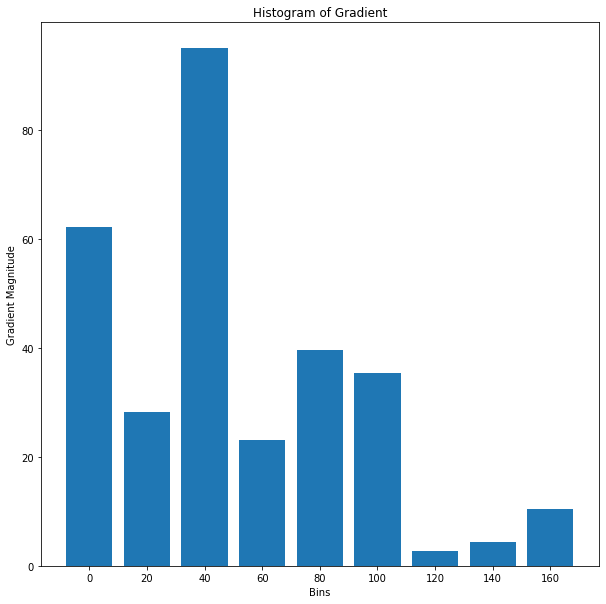

Image


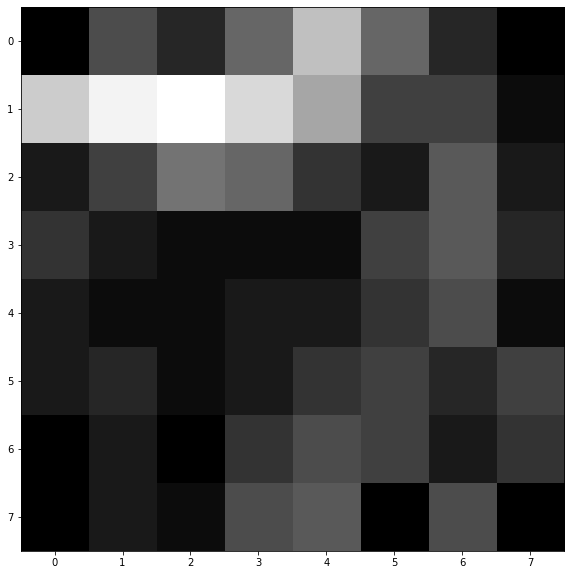

[82.8  24.3  31.05 17.4  42.55 59.   25.7   5.5   2.7 ]


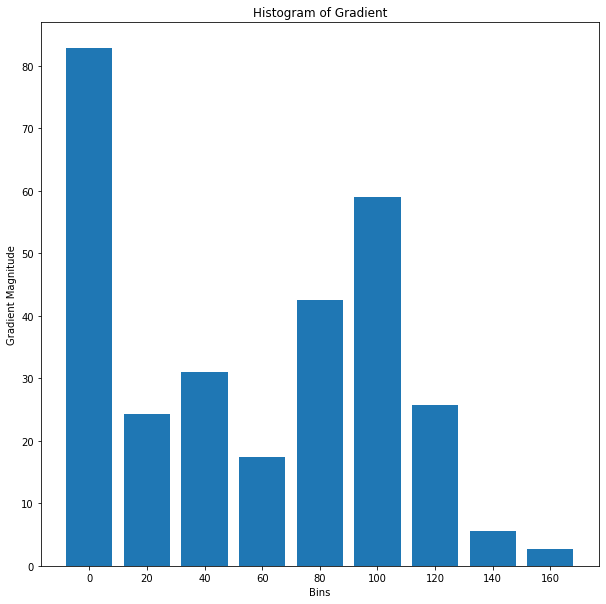

Image


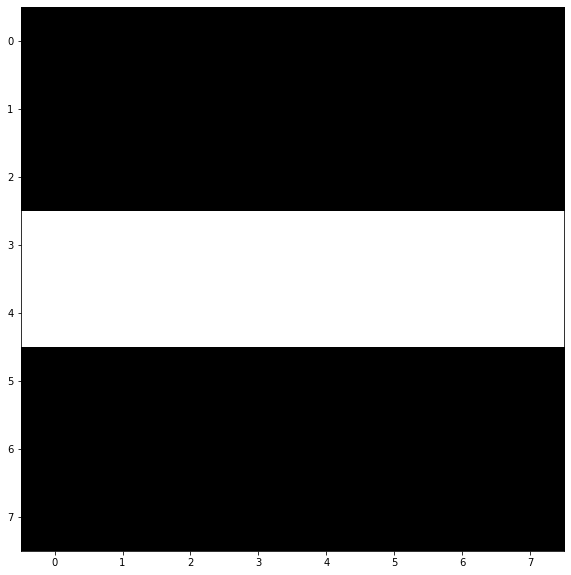

[0. 0. 0. 0. 8. 8. 0. 0. 0.]


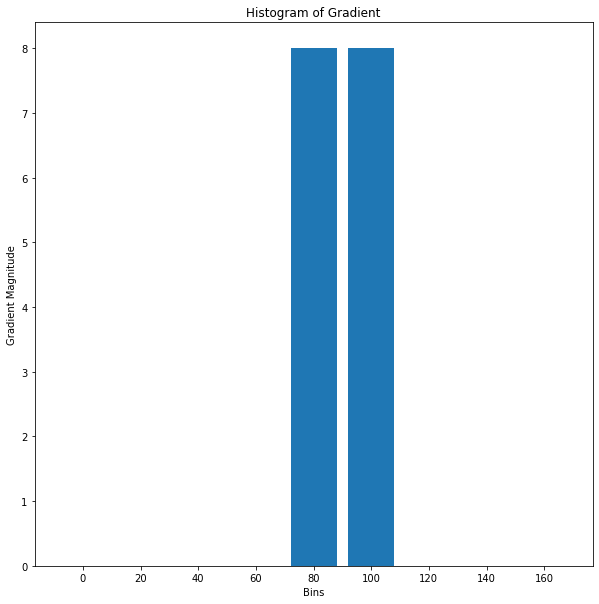

Image


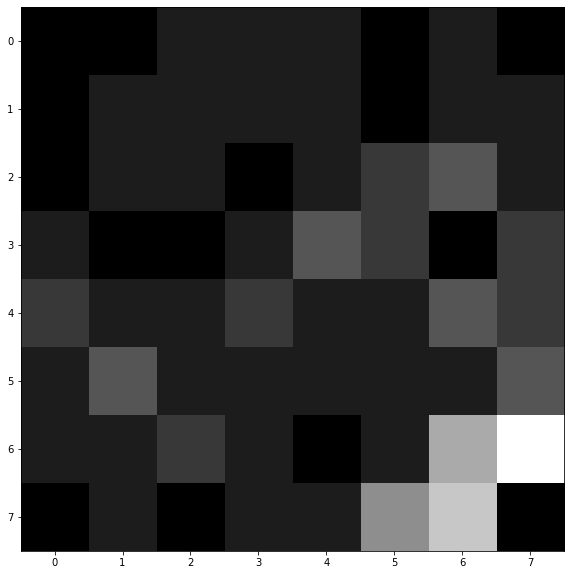

[28.    0.   10.5   9.6  17.9  14.3   3.45  5.25  0.  ]


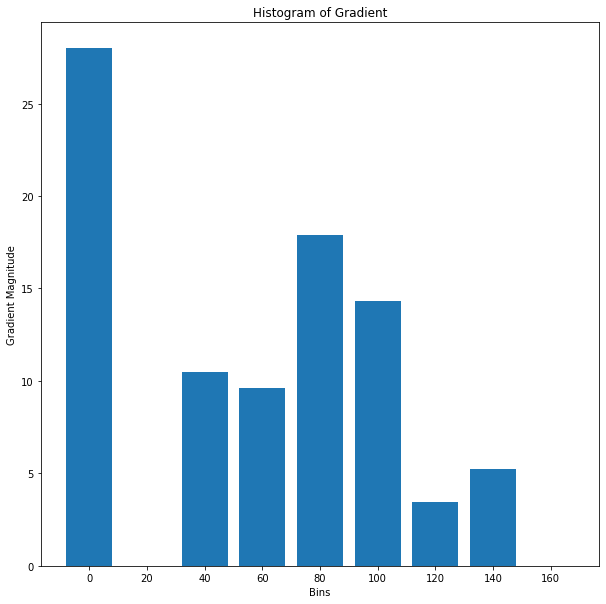

Image


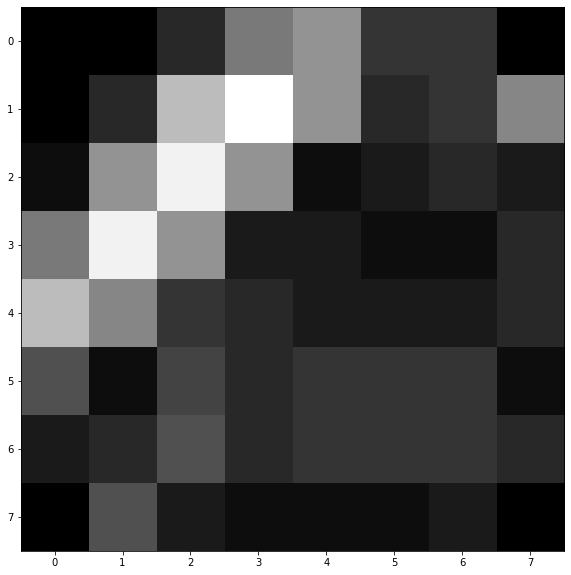

[62.2  28.3  95.   23.05 39.65 35.3   2.7   4.45 10.35]


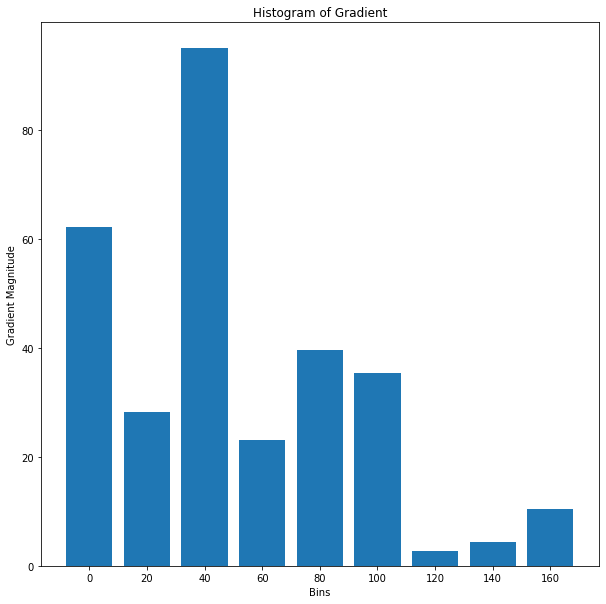

Image


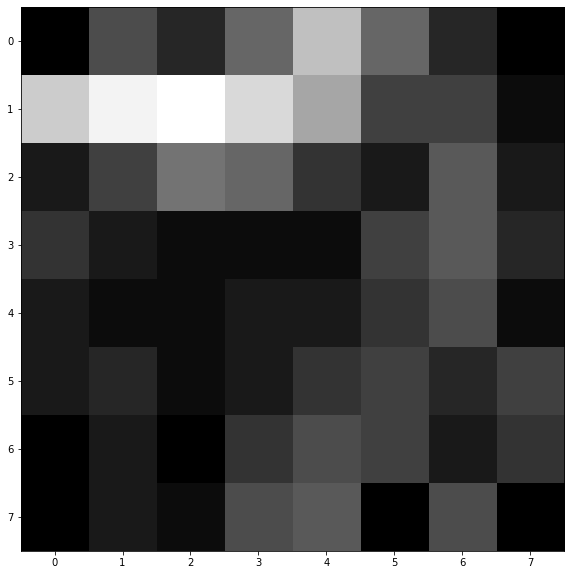

[82.8  24.3  31.05 17.4  42.55 59.   25.7   5.5   2.7 ]


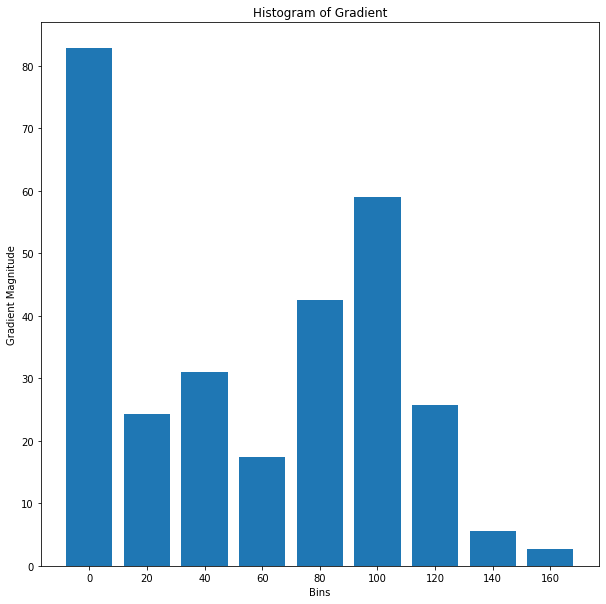

Image


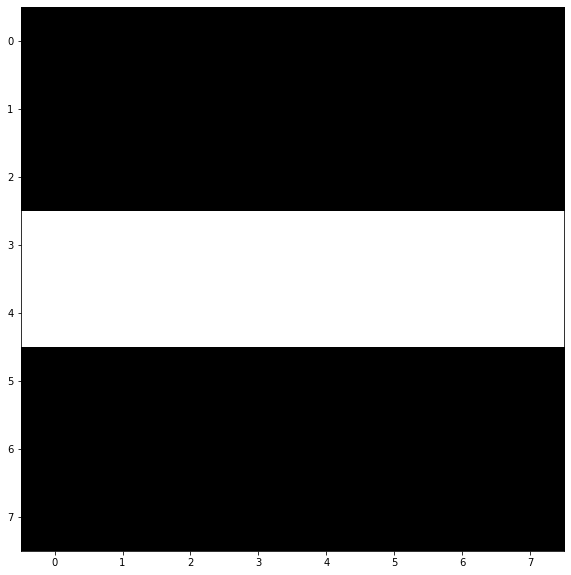

[0. 0. 0. 0. 8. 8. 0. 0. 0.]


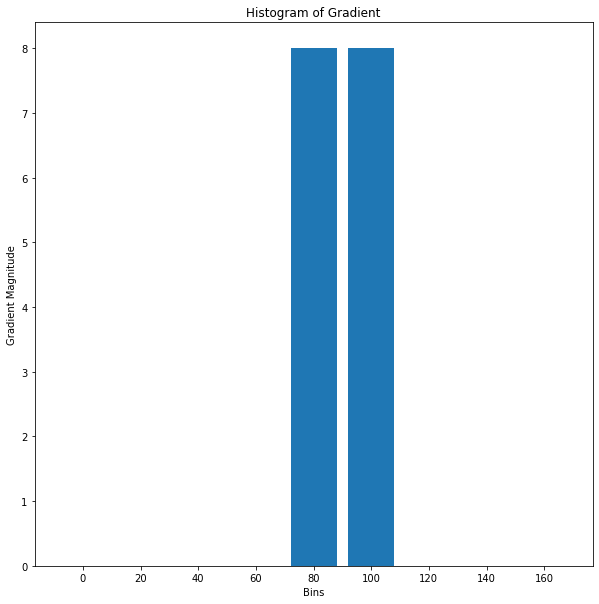

Image


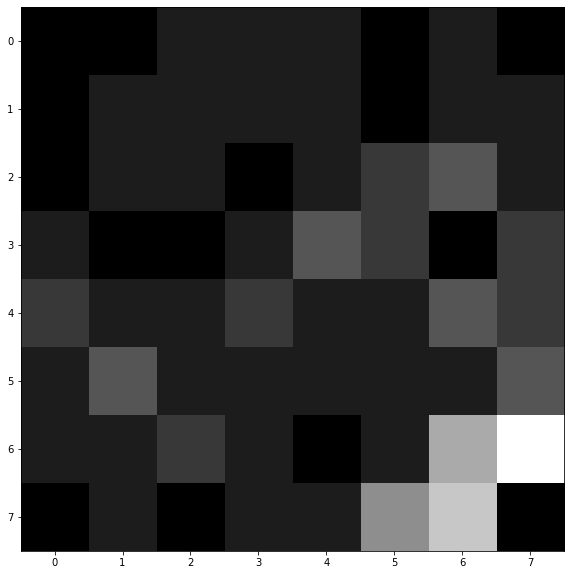

[28.    0.   10.5   9.6  17.9  14.3   3.45  5.25  0.  ]


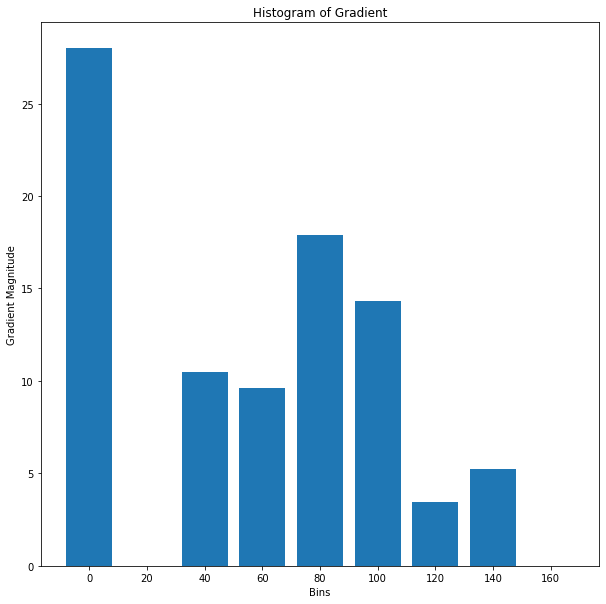

Image


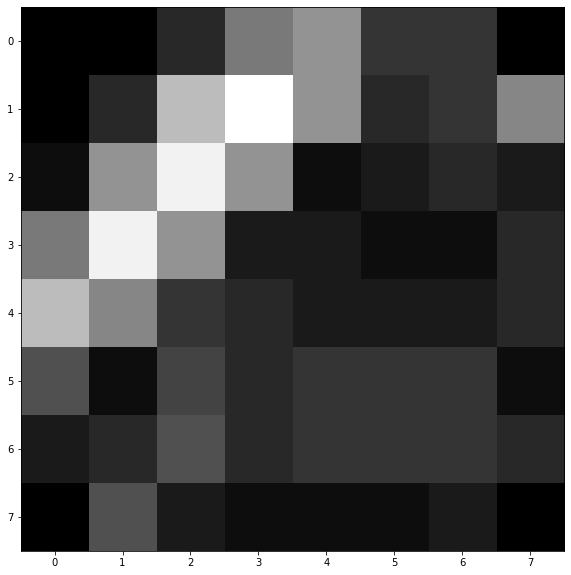

[62.2  28.3  95.   23.05 39.65 35.3   2.7   4.45 10.35]


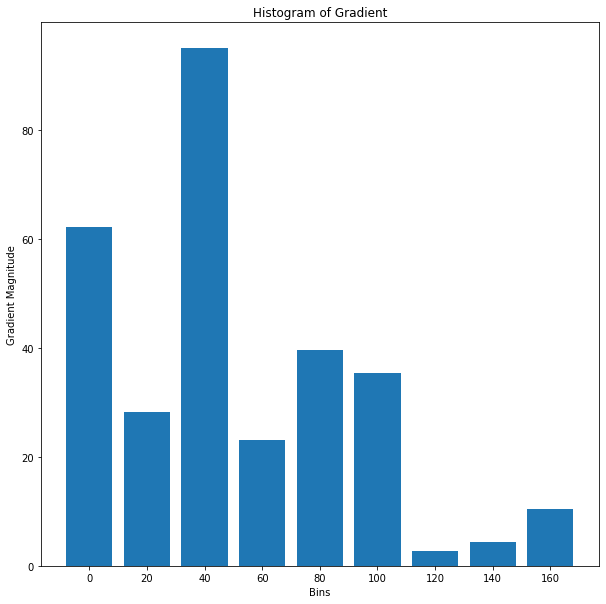

Image


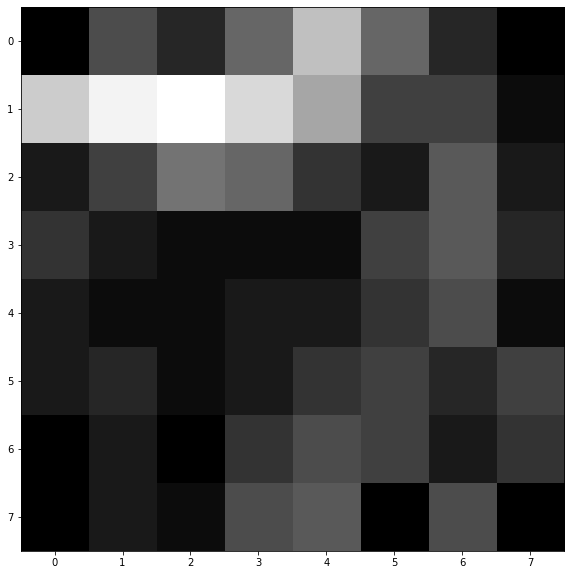

[82.8  24.3  31.05 17.4  42.55 59.   25.7   5.5   2.7 ]


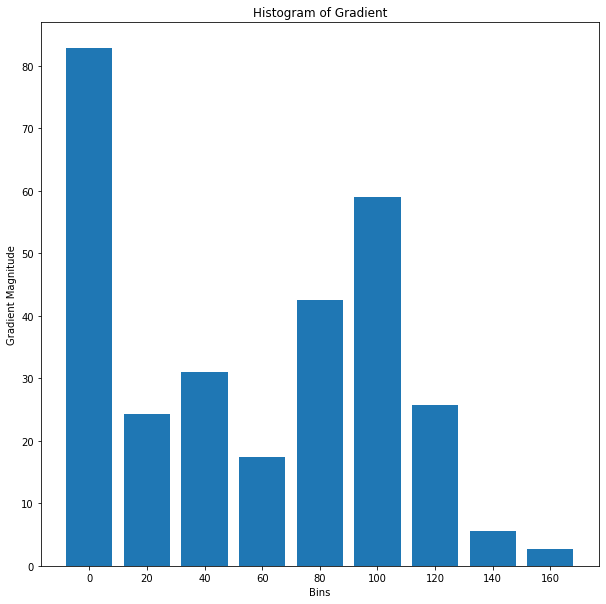

Image


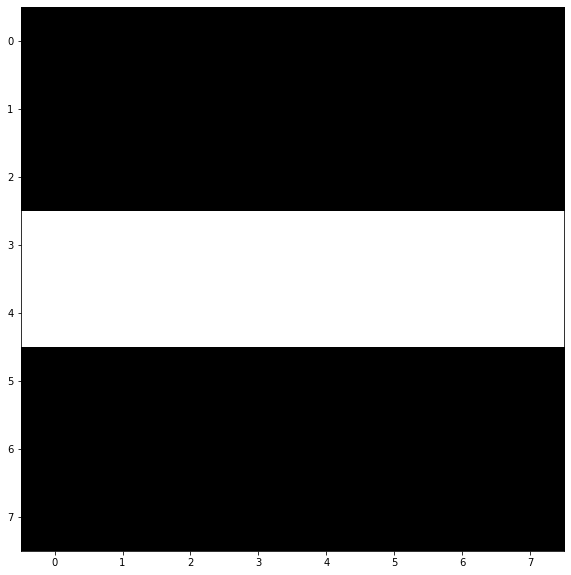

[0. 0. 0. 0. 8. 8. 0. 0. 0.]


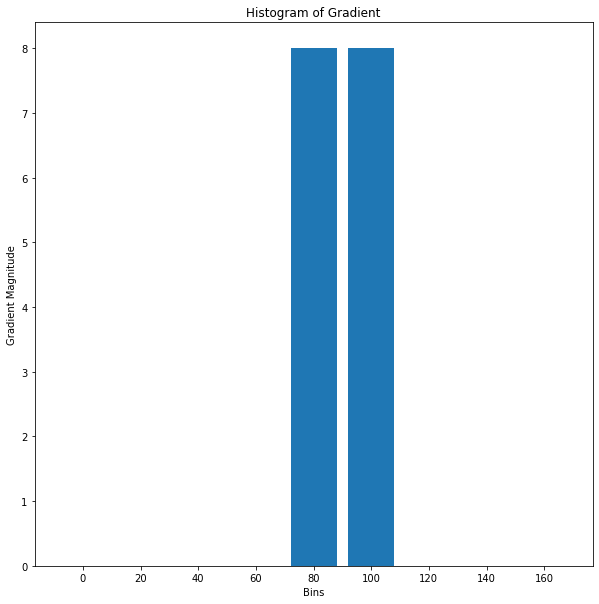

Image


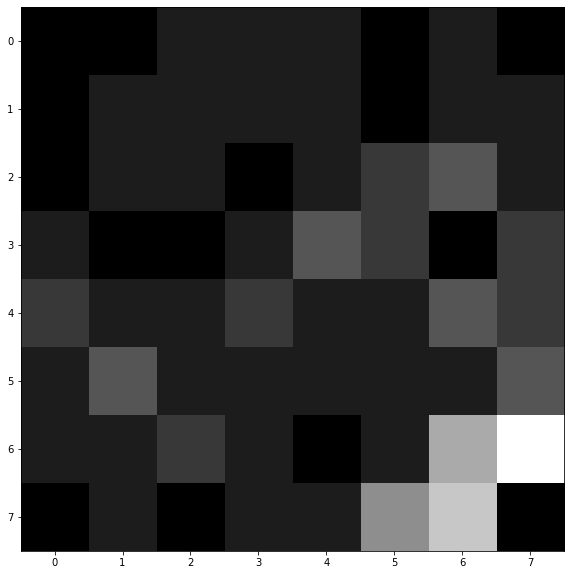

[28.    0.   10.5   9.6  17.9  14.3   3.45  5.25  0.  ]


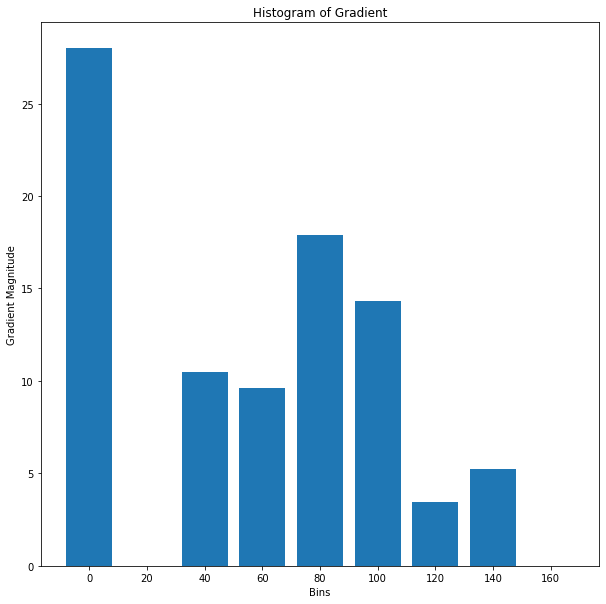

Image


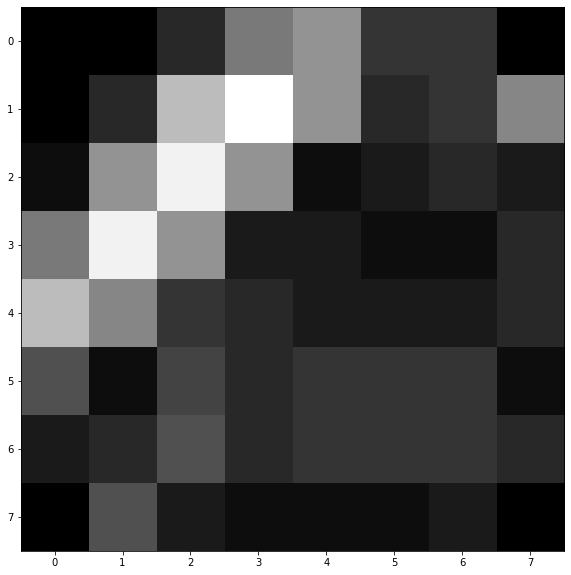

[62.2  28.3  95.   23.05 39.65 35.3   2.7   4.45 10.35]


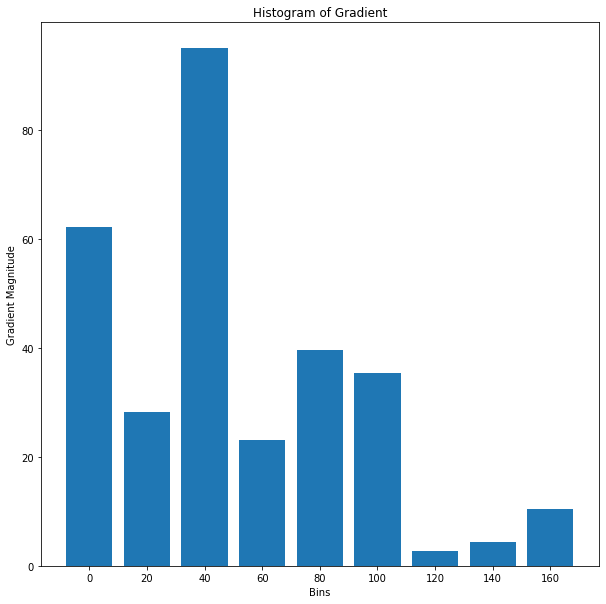

Image


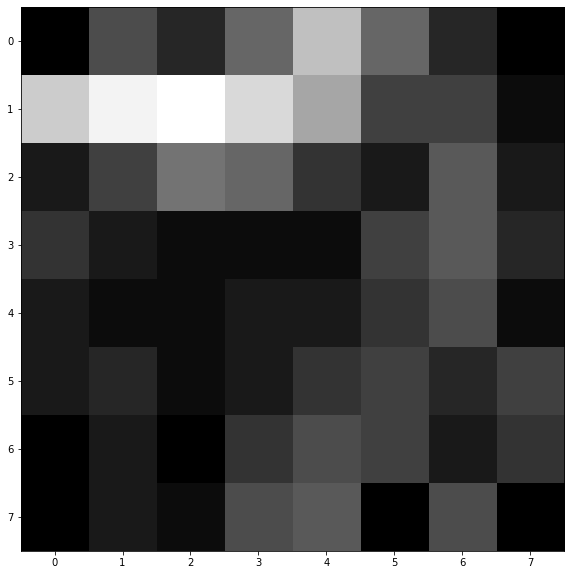

[82.8  24.3  31.05 17.4  42.55 59.   25.7   5.5   2.7 ]


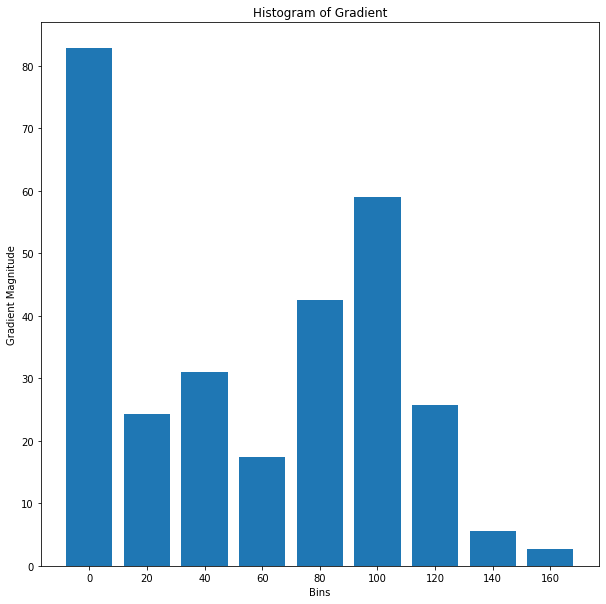

Image


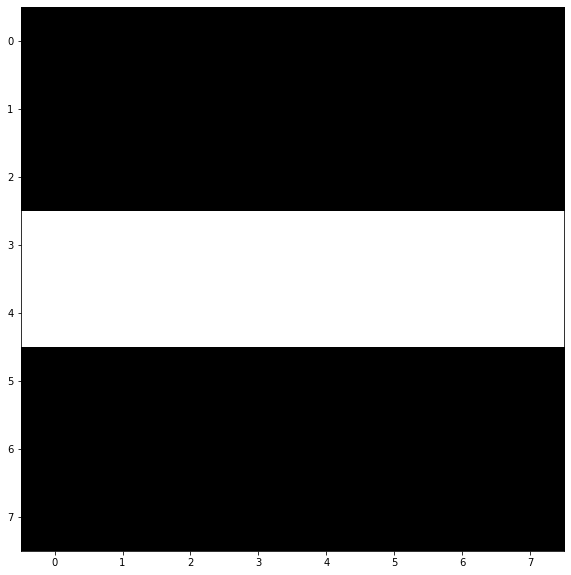

[0. 0. 0. 0. 8. 8. 0. 0. 0.]


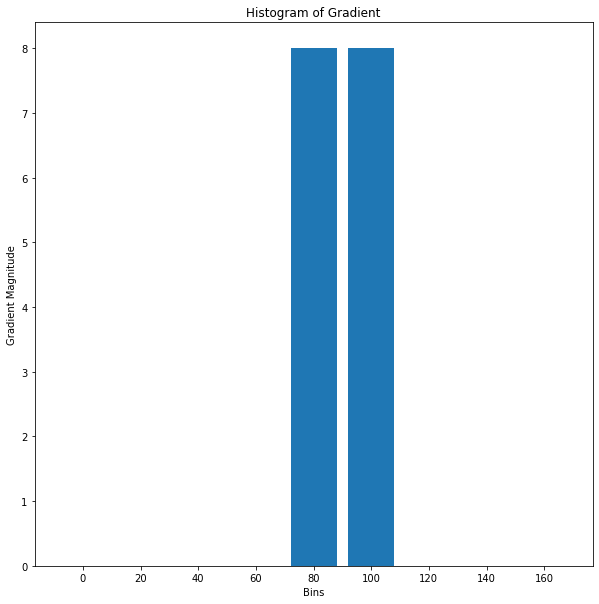

Image


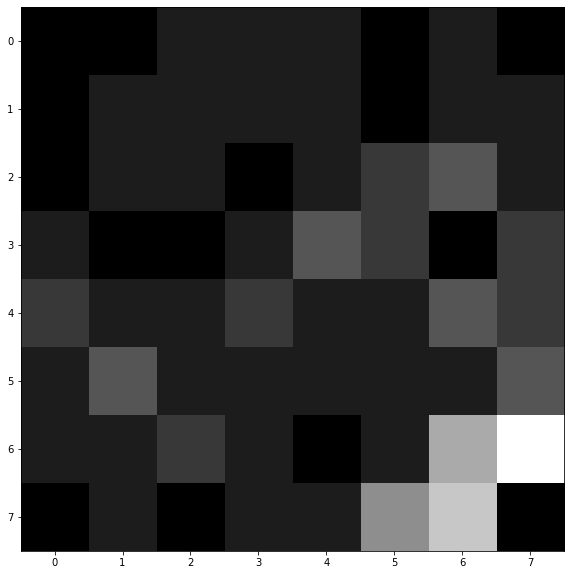

[28.    0.   10.5   9.6  17.9  14.3   3.45  5.25  0.  ]


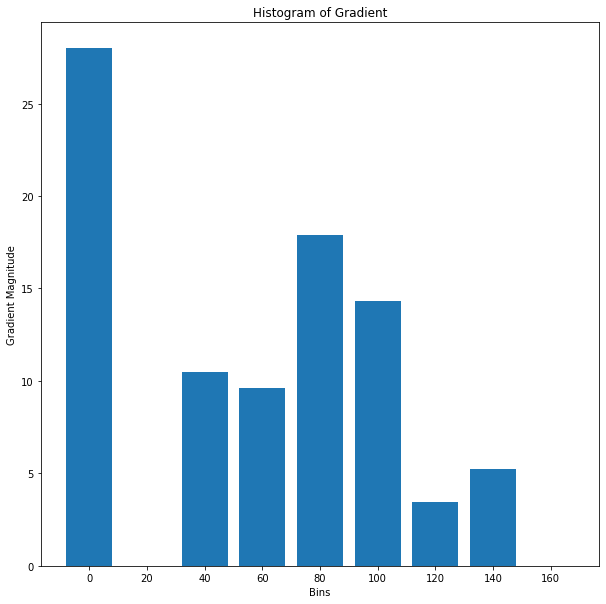

Image


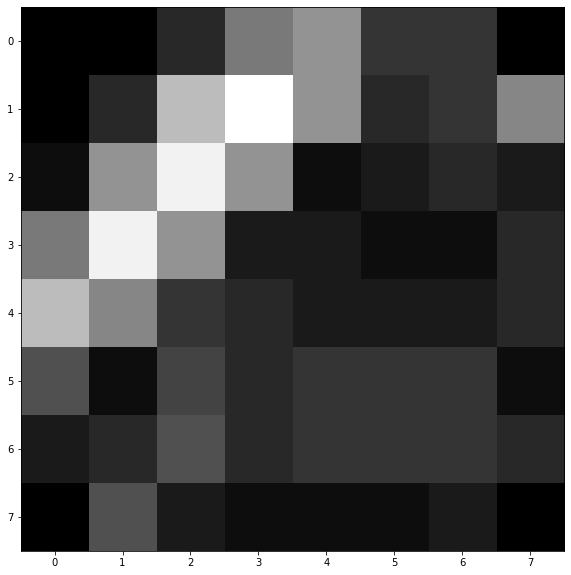

[62.2  28.3  95.   23.05 39.65 35.3   2.7   4.45 10.35]


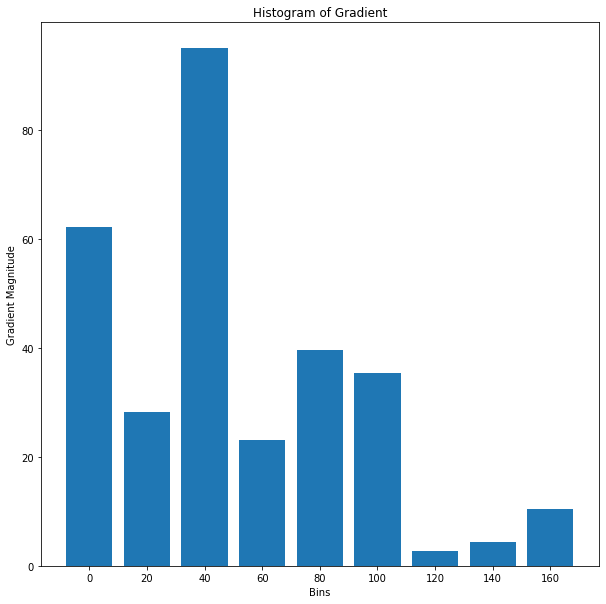

Image


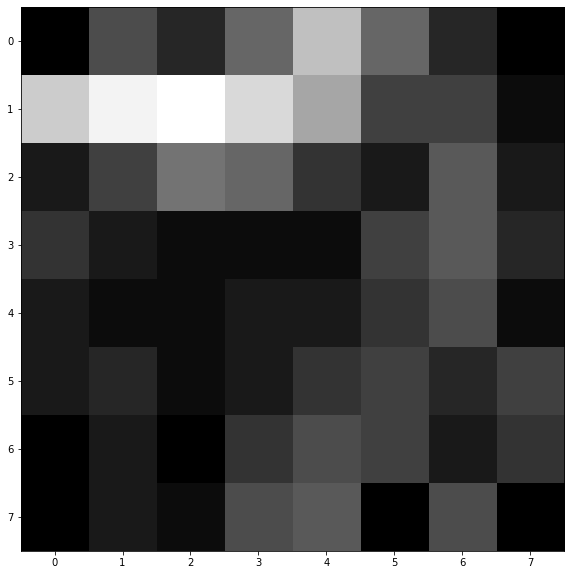

[82.8  24.3  31.05 17.4  42.55 59.   25.7   5.5   2.7 ]


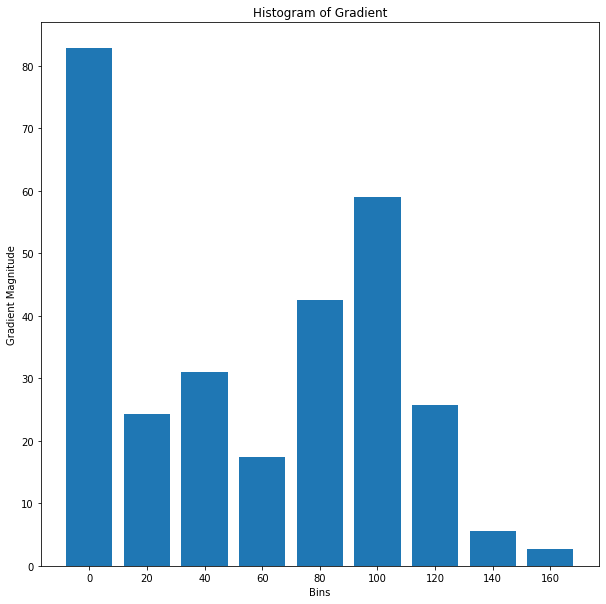

Image


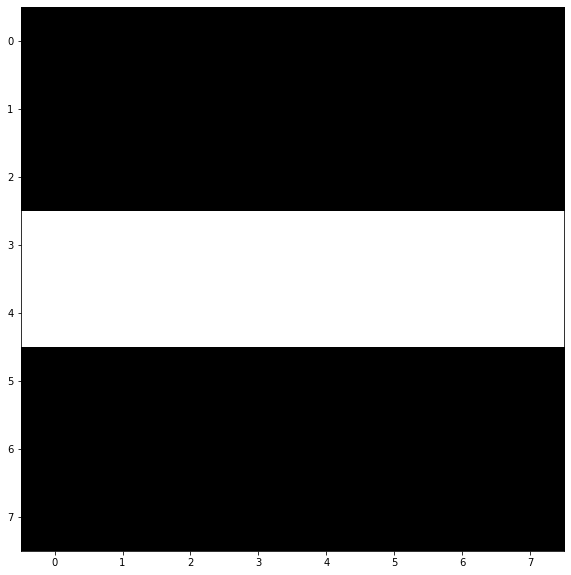

[0. 0. 0. 0. 8. 8. 0. 0. 0.]


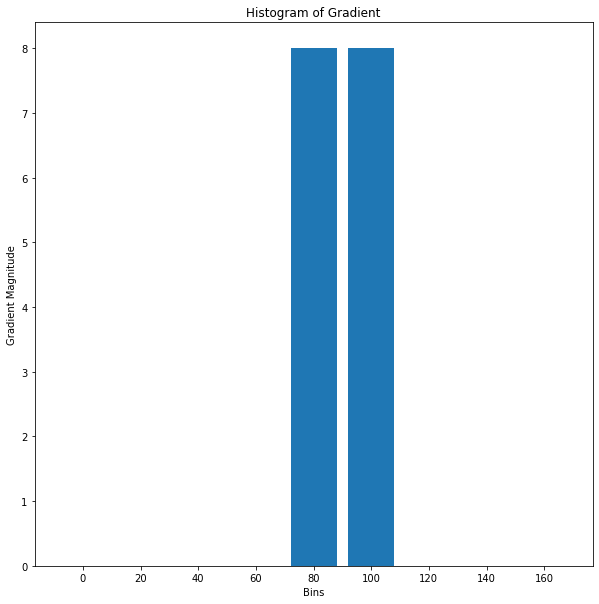

Image


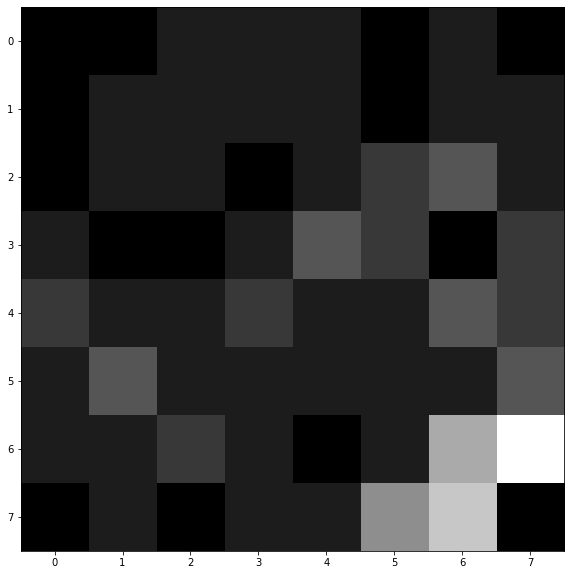

[28.    0.   10.5   9.6  17.9  14.3   3.45  5.25  0.  ]


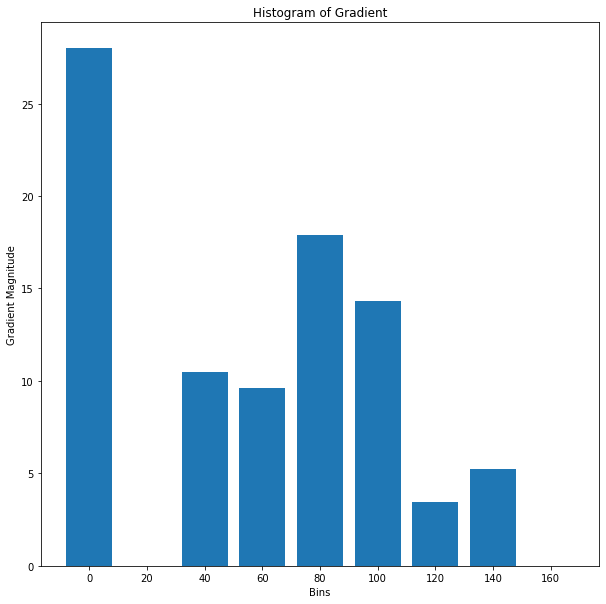

Image


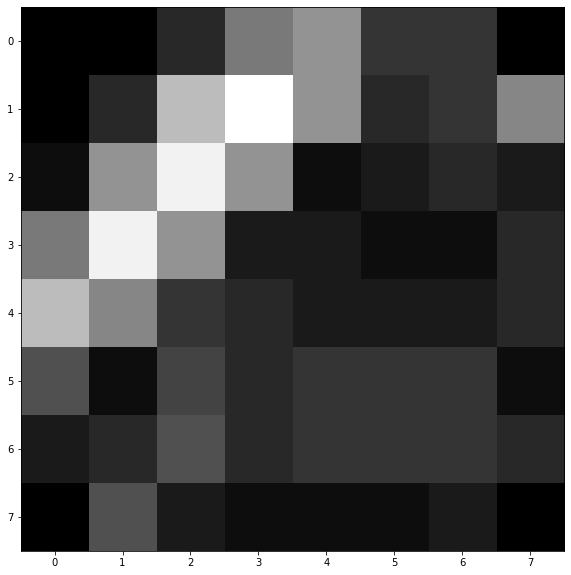

[62.2  28.3  95.   23.05 39.65 35.3   2.7   4.45 10.35]


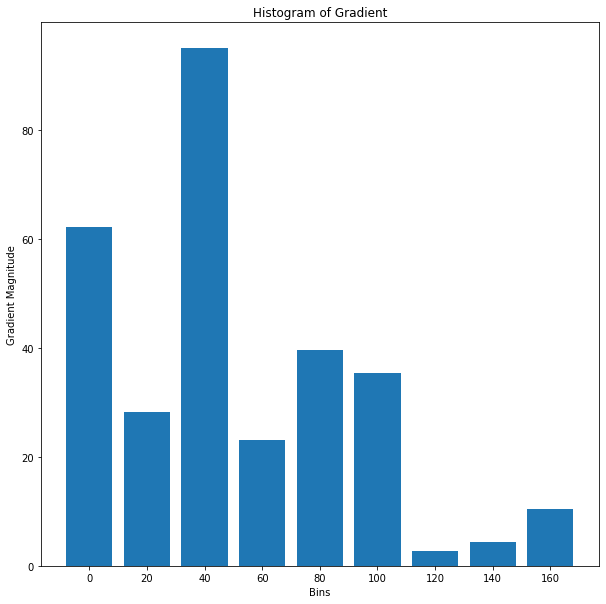

Image


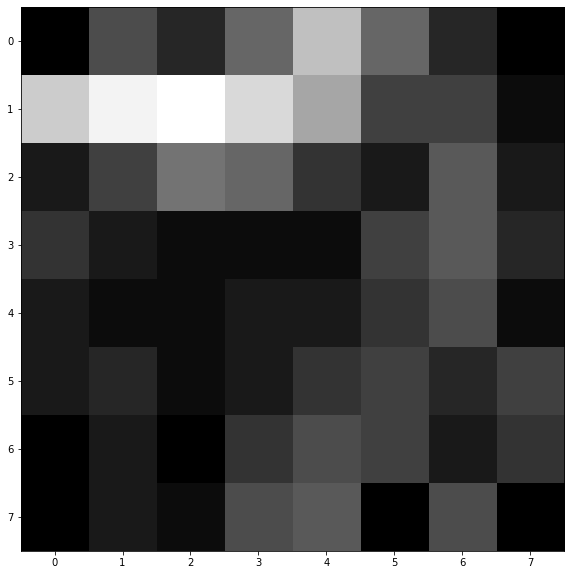

[82.8  24.3  31.05 17.4  42.55 59.   25.7   5.5   2.7 ]


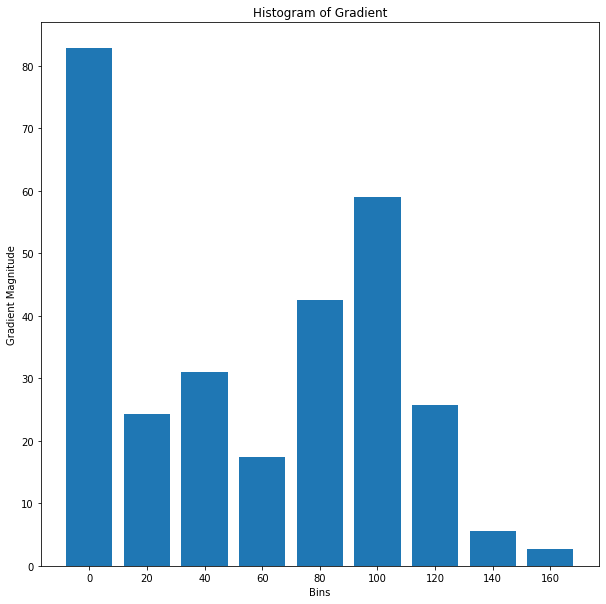

Feature dimension: (28, 9)


In [ ]:
Concatenate_histograms = []
tempImage = np.copy(IMAGE)
newImage = HoG_blocks(tempImage)
print("Feature dimension:", np.array(Concatenate_histograms).shape)